In [6]:
import numpy as np
from types import SimpleNamespace

def pca(X, n_components = None):
    ''' Perfrom principal component analysis on data X with [samples x features]
    '''
    n , p = X.shape
    dim = n_components if n_components else p
    xmean = X.mean(axis = 0)
    
    #mean center our data
    X = X - xmean
    
    # Do eigendecomposition via the SVD(single value decomposition)
    U, S, Vt = np.linalg.svd(X, full_matrices = False)
    
    # Compute eigenvalue from singular values.
    L = S**2 /(n-1)
    
    # Sort output by eigenvalues in descending order.
    inds = S.argsort()[::-1]
    eigvals = L[inds][:dim]
    pcs = Vt[inds][:dim]
    
    # 'pcs' the eigenvectors
    pcs = pcs.T
    
    # Transform X into latent variables Z.
    Z = (U*S)[:, :dim]
    
    out ={}
    out['pcs'] = pcs
    out['explained_variance'] = eigvals
    out['total_variance'] = eigvals.sum()
    out['Z'] = Z
    out['n_components'] = dim
    out['mean'] = xmean
    
    return SimpleNamespace(**out)

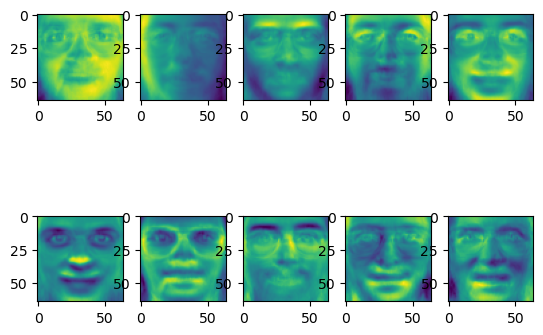

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(return_X_y= False)
result = pca(X = faces.data)
fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.flat):
    ax.imshow(result.pcs[:, i].reshape(faces.images[0].shape))